<a href="https://colab.research.google.com/github/renatamontanhana/-Maquinas_Preditivas_SVM/blob/main/M5A32_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

# <font color='BLUE'>Cientista de Dados na Prática </font>

# <font color='Purple'>Módulo 5 - Máquinas Preditivas</font>

### <font color='GREY'> SVM - Support Vector Machines </font>  





# 1° Problema de Negócio

Usando SVM Para Prever a Intenção de Compra de Usuários de E-*Commerce*.

Queremos saber se o cliente **está ou não propenso a comprar** produtos no seu site, para que o departamento de Marketing faça campanhas de vendas direcionadas a esses clientes.



![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ1bshmktEZsMtTteqrtnLAF2I-EJptURO-cA&usqp=CAU)


#### **Fonte de Dados**
Online Shoppers Purchasing Intention Dataset

https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

O conjunto de dados consiste em uma pancada de variáveis pertencentes a 12.330 sessões online. O conjunto de dados foi formado de modo que cada sessão pertença a um usuário diferente em um período de 1 ano para evitar qualquer tendência para uma campanha específica, dia especial, usuário, perfil ou período.

O conjunto de dados consiste em 10 atributos numéricos e 8 categóricos. O atributo 'Revenue' (target) ("true" or "false") pode ser usado como o rótulo da classe.

#2° Análise Exploratória dos Dados

## Importando os Pacotes

In [ ]:
# Instala o pacote watermark.
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.0 MB/s eta 0:00:00


In [ ]:
# Imports
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm
import sklearn
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Ciêntista de dados na Prática" --iversions

Author: Ciêntista de dados na Prática

sklearn   : 1.2.2
pandas    : 1.5.3
seaborn   : 0.12.2
matplotlib: 3.7.1
numpy     : 1.23.5



## Carga dos Dados

In [ ]:
# Carregando os dados
df_original = pd.read_csv('/content/online_shoppers_intention.csv')
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## AD - Arquitetura dos Dados

**"Administrativo", "Duração administrativa", "Informativo", "Duração informativo", "Relacionado ao produto" e "Duração relacionada ao produto"** representam o número de diferentes tipos de páginas visitadas pelo visitante nessa sessão e o tempo total gasto em cada uma dessas categorias de página. Os valores desses recursos são derivados das informações de URL das páginas visitadas pelo usuário e atualizadas em tempo real quando um usuário executa uma ação, por exemplo, passando de uma página para outra.

Os recursos **"Taxa de rejeição", "Taxa de saída" e "Valor da página" **representam as métricas medidas pelo "Google Analytics" para cada página no site de comércio eletrônico.

O valor do recurso **"Taxa de rejeição"** de uma página da web refere-se à porcentagem de visitantes que entram no site a partir dessa página e saem ("rejeição") sem acionar outras solicitações ao servidor durante essa sessão.

O valor do recurso **"Taxa de saída"** para uma página da web específica é calculado como a porcentagem que foi a última na sessão, para todas as exibições de página a página.

O recurso **"Valor da página"** representa o valor médio para uma página da web que um usuário visitou antes de concluir uma transação de comércio eletrônico.

O recurso **"Dia especial"** indica a proximidade do horário de visita do site a um dia especial específico (por exemplo, dia das mães, dia dos namorados) em que as sessões têm mais probabilidade de serem finalizadas com a transação. O valor desse atributo é determinado considerando a dinâmica do comércio eletrônico, como a duração entre a data do pedido e a data de entrega. Por exemplo, no dia dos namorados, esse valor assume um valor diferente de zero entre 2 e 12 de fevereiro (dia dos namorados nos EUA e Europa), zero antes e depois dessa data, a menos que esteja próximo de outro dia especial e seu valor máximo de 1 em 8 de fevereiro.

O conjunto de dados também inclui o tipo de **sistema operacional, navegador, região, tipo de tráfego, tipo de visitante como visitante novo ou recorrente, um valor booleano indicando se a data da visita é final de semana e mês do ano.**

A variável alvo **(Revenue)** é booleana, com **True se a sessão gerou** **receita** e False se não gerou.

## Explorando Dados

In [ ]:
# Shape
df_original.shape

(12330, 18)

In [ ]:
# Tipos de Dados
df_original.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [ ]:
# Verificando valores missing
print(df_original.isna().sum())

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [ ]:
# Removendo as linhas com valores missing
df_original.dropna(inplace = True)

In [ ]:
# Verificando valores missing
print(df_original.isna().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [ ]:
# Shape
df_original.shape

(12316, 18)

In [ ]:
# Verificando Valores Únicos
df_original.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

Para fins de visualização, dividiremos os dados em variáveis **contínuas e categóricas**. Trataremos todas as variáveis com menos de 30 entradas únicas como categóricas.

In [ ]:
# Preparando os dados para o plot

# Cria uma cópia do dataset original
df = df_original.copy()

# Listas vazias para os resultados
continuous = []
categorical = []

# Loop pelas colunas
for c in df.columns[:-1]:
    if df.nunique()[c] >= 30:
        continuous.append(c)
    else:
        categorical.append(c)

In [ ]:
continuous

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [ ]:
categorical

['Administrative',
 'Informational',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [ ]:
# Variáveis contínuas
df[continuous].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0
1,0.0,0.0,2.0,64.000000,0.00,0.10,0.0
2,-1.0,-1.0,1.0,-1.000000,0.20,0.20,0.0
3,0.0,0.0,2.0,2.666667,0.05,0.14,0.0
4,0.0,0.0,10.0,627.500000,0.02,0.05,0.0


In [ ]:
# Variáveis categóricas
df[categorical].head()

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0.0,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0.0,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0.0,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0.0,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


Gráficos para variáveis numéricas.

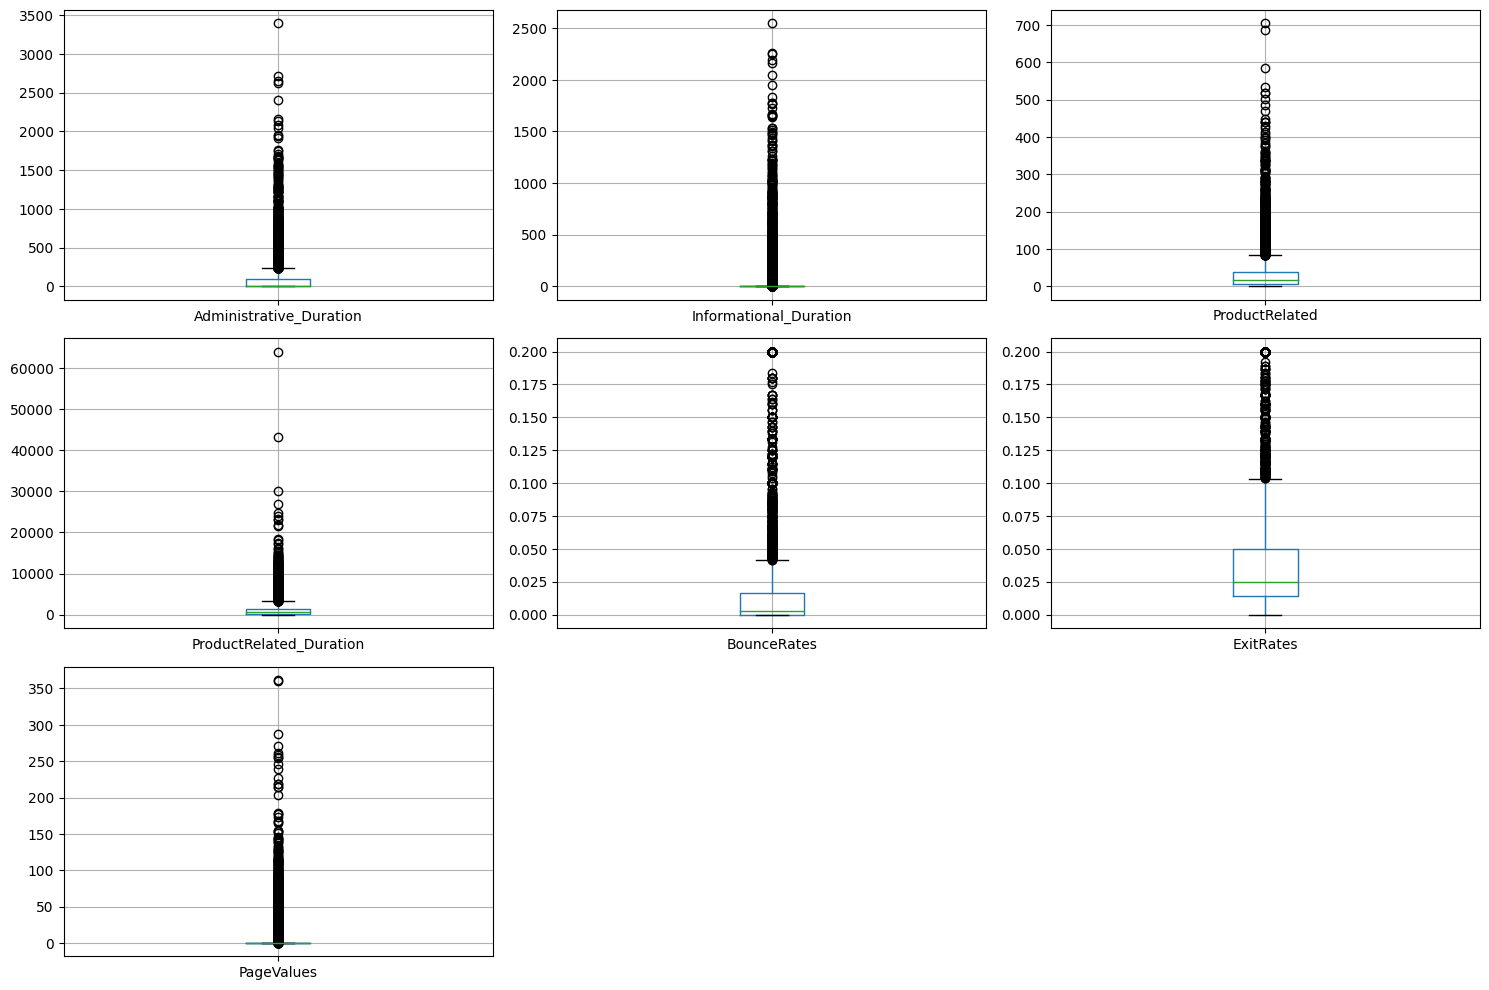

In [ ]:
# Plot das variáveis contínuas

# Tamanho da área de plotagem
fig = plt.figure(figsize = (15,10))

# Loop pelas variáveis contínuas
for i, col in enumerate(continuous):
    plt.subplot(3, 3, i + 1);
    df.boxplot(col);
    plt.tight_layout()

plt.savefig('boxplot1.png')

Variáveis contínuas parecem extremamente distorcidas. Vamos aplicar transformação de log para melhor visualização.

In [ ]:
# Transformação de log nas variáveis contínuas
df[continuous] = np.log1p(1 + df[continuous])

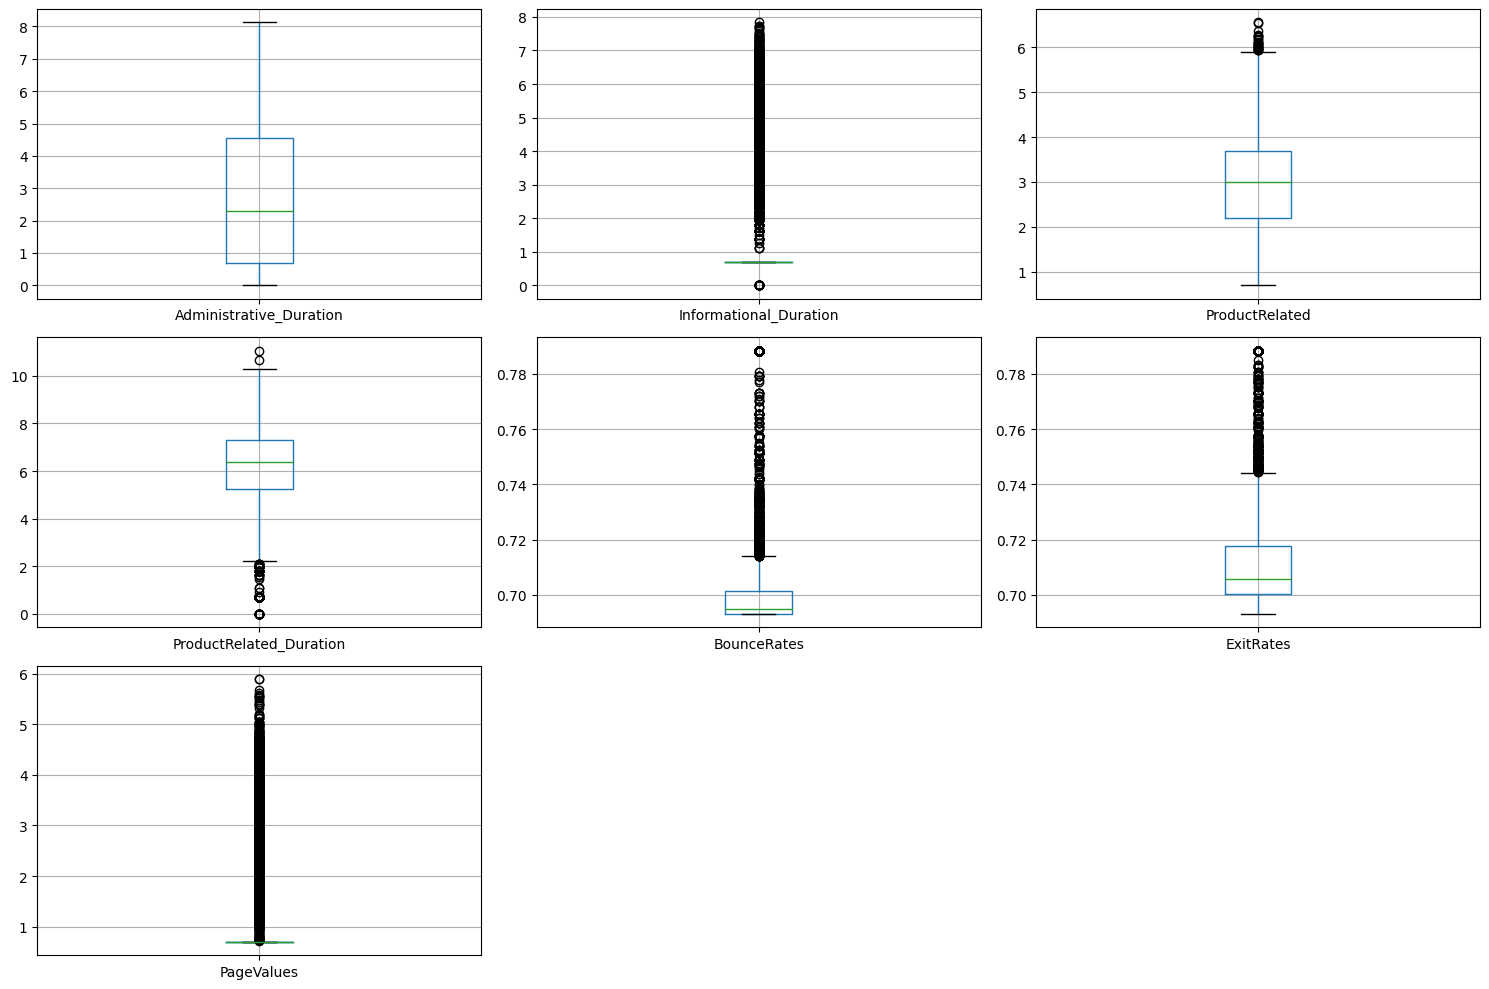

In [ ]:
# Plot das variáveis contínuas

# Tamanho da área de plotagem
fig = plt.figure(figsize = (15,10))

# Loop pelas variáveis contínuas
for i,col in enumerate(continuous):
    plt.subplot(3,3,i+1);
    df.boxplot(col);
    plt.tight_layout()
plt.savefig('boxplot2.png')

Matriz de Correlação Entre Variáveis Contínuas.

<Axes: >

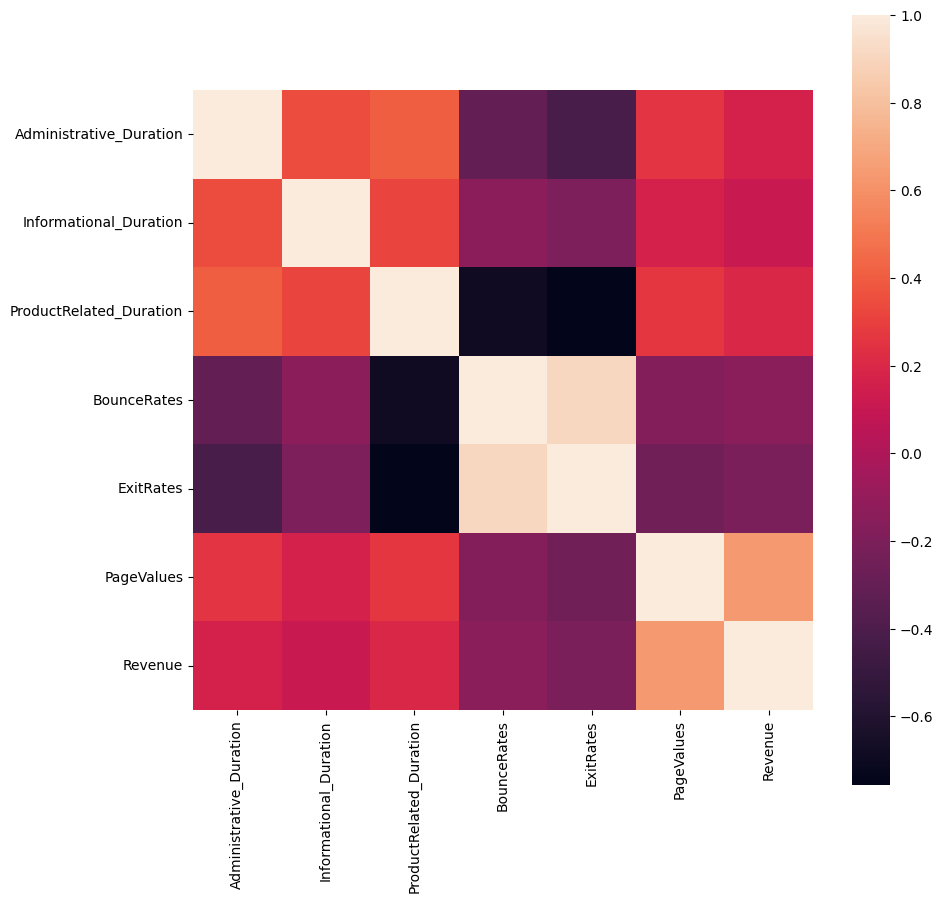

In [ ]:
# Área de plotagem
plt.figure(figsize = (10,10))

# Matriz de Correlação
sns.heatmap(df[['Administrative_Duration',
                'Informational_Duration',
                'ProductRelated_Duration',
                'BounceRates',
                'ExitRates',
                'PageValues',
                'Revenue']].corr(), vmax = 1., square = True)

Visualização de gráficos de variáveis categóricas para analisar como a variável de destino é influenciada por elas.

<Axes: title={'center': 'Venda ou Não'}, ylabel='count'>

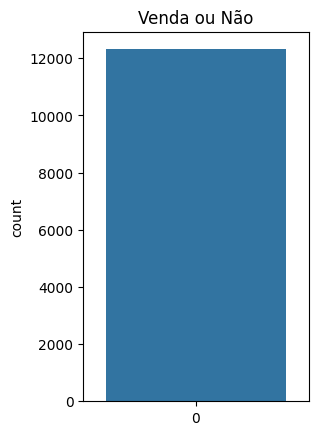

In [ ]:
# Countplot Venda ou Não
plt.subplot(1,2,2)
plt.title("Venda ou Não")
sns.countplot(df['Revenue'])

ValueError: could not convert string to float: 'Returning_Visitor'

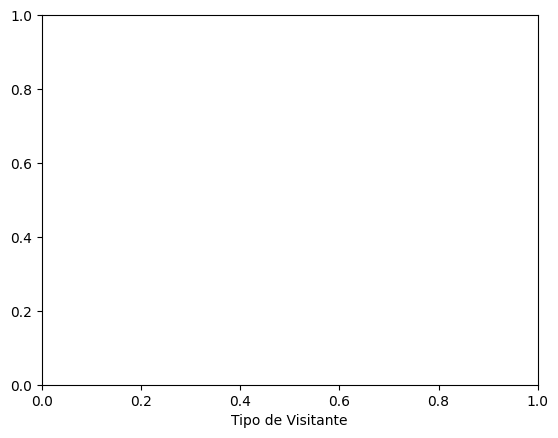

In [ ]:
# Countplot Tipo de Visitante
plt.xlabel("Tipo de Visitante")
sns.countplot(df['VisitorType'])
df['VisitorType'] = df['VisitorType'].astype('category')
sns.countplot(df['VisitorType'])


In [ ]:
# Stacked Bar Tipo de Visitante x Revenue
pd.crosstab(df['VisitorType'], df['Revenue']).plot(kind = 'bar',
                                                   stacked = True,
                                                   figsize = (20, 5),
                                                   color = ['red', 'green'])

In [ ]:
# Pie Chart Tipos de Visitantes
labels = ['Visitante_Retornando', 'Novo_Visitante', 'Outro']
plt.title("Tipos de Visitantes")
plt.pie(df['VisitorType'].value_counts(), labels = labels, autopct = '%.2f%%')
plt.legend()

In [ ]:
# Countplot Final de Semana ou Não
plt.subplot(1,2,1)
plt.title("Final de Semana ou Não")
sns.countplot(df['Weekend'])

In [ ]:
# Stacked Bar Final de Semana x Revenue
pd.crosstab(df['Weekend'], df['Revenue']).plot(kind = 'bar',
                                               stacked = True,
                                               figsize = (15, 5),
                                               color = ['red', 'green'])

In [ ]:
# Countplot Tipos de Sistemas Operacionais
#plt.figure(figsize = (15,6))
plt.title("Tipos de Sistemas Operacionais")
plt.xlabel("Sistema Operacional Usado")
sns.countplot(df['OperatingSystems'])

In [ ]:
# Stacked Bar Tipo de SO x Revenue
pd.crosstab(df['OperatingSystems'], df['Revenue']).plot(kind = 'bar',
                                                        stacked = True,
                                                        figsize = (15, 5),
                                                        color = ['red', 'green'])

In [ ]:
# Countplot Tipo de Tráfego
plt.title("Tipos de Tráfego")
plt.xlabel("Tipo de Tráfego")
sns.countplot(df['TrafficType'])

In [ ]:
# Stacked Bar Tipos de Tráfego x Revenue
pd.crosstab(df['TrafficType'], df['Revenue']).plot(kind = 'bar',
                                                   stacked = True,
                                                   figsize = (15, 5),
                                                   color = ['red', 'green'])

#3° Pré-Processamento dos Dados

In [ ]:
df_original.head()

In [ ]:
# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
df_original['Month'] = lb.fit_transform(df_original['Month'])
df_original['VisitorType'] = lb.fit_transform(df_original['VisitorType'])

# Remove valores missing eventualmente gerados
df_original.dropna(inplace = True)

In [ ]:
df_original.head(100)

In [ ]:
# Shape
df_original.shape

In [ ]:
# Verificando se a variável resposta está balanceada
target_count = df_original.Revenue.value_counts()
target_count

In [ ]:
# Plot
sns.countplot(df_original.Revenue, palette = "OrRd")
plt.box(False)
plt.xlabel('Receita (Revenue) Por Sessão Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Sessões', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [ ]:
# Instala e importa o pacote imblearn - Aplicar o balanceamento da variável resposta
!pip install -q imblearn
import imblearn

In [ ]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Ciência dos Dados" --iversions

In [ ]:
# Shape
df_original.shape

In [ ]:
# Variáveis explicativas
df_original.iloc[:, 0:17].head()

In [ ]:
# Variável Target
df_original.iloc[:, 17].head()

**Balanceamento de Classe - Oversampling**

In [ ]:
# Importa a função
from imblearn.over_sampling import SMOTE

# Seed para reproduzir o mesmo resultado
seed = 7

# Separa X e y
X = df_original.iloc[:, 0:17]
y = df_original.iloc[:, 17]

# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state = seed)

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

In [ ]:
# Plot
sns.countplot(y_res, palette = "OrRd")
plt.box(False)
plt.xlabel('Receita (Revenue) Por Sessão Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Sessões', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [ ]:
# Shape dos dados originais
df_original.shape

In [ ]:
# Shape dos dados reamostrados
X_res.shape

In [ ]:
# Shape dos dados reamostrados
y_res.shape

In [ ]:
# Ajustando X e y
X = X_res
y = y_res

In [ ]:
# Divisão em Dados de Treino e Teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 7)

#4° Construção da Máquina Preditiva

### Modelo Baseline com Kernel Linear e Dados Padronizados (Scaled)

In [ ]:
# Padronização
sc = StandardScaler()
X_treino_scaled = sc.fit_transform(X_treino)
X_teste_scaled = sc.transform(X_teste)

***Observação:***

Para impedir que as informações sobre a distribuição do conjunto de teste vazem em seu modelo, o ideal é aplicar a padronização em separado nos dados de treino e de teste, ajustando o redimensionador apenas aos dados de treinamento, padronizando então os conjuntos de treinamento e teste com esse redimensionador (exatamente como está na célula acima). Ao ajustar o redimensionador no conjunto de dados completo antes da divisão em treino e teste, informações sobre o conjunto de testes são usadas para transformar o conjunto de treinamento.

Conhecer a distribuição de todo o conjunto de dados pode influenciar como você detecta e processa outliers, bem como como você parametriza seu modelo. Embora os dados em si não sejam expostos, há informações sobre a distribuição dos dados. Como resultado, o desempenho do seu conjunto de testes não é uma estimativa real do desempenho em dados invisíveis.

**Sempre aplique a padronização depois de fazer a divisão em treino e teste**, exatamente como fizemos aqui. Usamos fit_transform() nos dados de treino e transform() nos dados de teste quando usamos o StandardScaler().

In [ ]:
X_treino_scaled

In [ ]:
X_teste_scaled

In [ ]:
# Cria o modelo
modelo_v1 = svm.SVC(kernel = 'linear')

In [ ]:
# Treinamento
start = time.time()
modelo_v1.fit(X_treino_scaled, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo foi de :', end - start)

In [ ]:
# Previsões
previsoes_v1 = modelo_v1.predict(X_teste_scaled)

#5° Avaliação da Máquina Preditiva

In [ ]:
# Dicionário de métricas e metadados
SVM_dict_v1 = {'Modelo':'SVM',
               'Versão':'1',
               'Kernel':'Linear com Dados Padronizados',
               'Precision':precision_score(previsoes_v1, y_teste),
               'Recall':recall_score(previsoes_v1, y_teste),
               'F1 Score':f1_score(previsoes_v1, y_teste),
               'Acurácia':accuracy_score(previsoes_v1, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v1)}

In [ ]:
# Print
print("Métricas em Teste:\n")
SVM_dict_v1

### Otimização de Hiperparâmetros com Grid Search e Kernel RBF

#### Como escolher a faixa de valores dos Hyperparâmetros?

É necessário entender como os valores alteram o resultado. Para isso, a documentação dos algoritmos tem as informações necessárias para você escolher os valores iniciais e depois partir para novos testes e novos valores a serem considerados.

https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

In [ ]:
# Cria o modelo
modelo_v2 = svm.SVC(kernel = 'rbf')



In [ ]:
# Valores para o grid
C_range = np.array([50., 100., 200.])
gamma_range = np.array([0.3*0.001,0.001,3*0.001])



In [ ]:
# Grid de hiperparâmetros
svm_param_grid = dict(gamma = gamma_range, C = C_range)



In [ ]:
# Grid Search
start = time.time()
modelo_v2_grid_search_rbf = GridSearchCV(modelo_v2, svm_param_grid, cv = 3)



In [ ]:
# Treinamento
modelo_v2_grid_search_rbf.fit(X_treino_scaled, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo com Grid Search:', end - start)



In [ ]:
# Acurácia em Treino
print(f"Acurácia em Treinamento: {modelo_v2_grid_search_rbf.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo_v2_grid_search_rbf.best_params_}")

In [ ]:
# Previsões
previsoes_v2 = modelo_v2_grid_search_rbf.predict(X_teste_scaled)

In [ ]:
# Dicionário de métricas e metadados
SVM_dict_v2 = {'Modelo':'SVM',
               'Versão':'2',
               'Kernel':'RBF com Tunning de Hyperparâmetros',
               'Precision':precision_score(previsoes_v2, y_teste),
               'Recall':recall_score(previsoes_v2, y_teste),
               'F1 Score':f1_score(previsoes_v2, y_teste),
               'Acurácia':accuracy_score(previsoes_v2, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v2)}

In [ ]:
# Print
print("Métricas em Teste:\n")
SVM_dict_v2

In [ ]:
# Concatena todos os dicionários em um dataframe do Pandas
resumo = pd.DataFrame({'Baseline':pd.Series(SVM_dict_v1),
                       'Máquina_Preditiva':pd.Series(SVM_dict_v2)})

In [ ]:
# Print
resumo

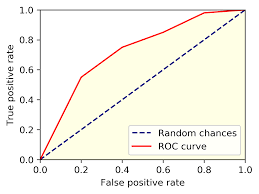




# Fim

## Valeu!

### #Links - Ciencia dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>